### Tasca M8 T01

- Exercici 1 Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

- Exercici 2 Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

- Exercici 3 Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

----------------------------------------------------------------------------------------------------------------------------

### Exercici 1:

- Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

#### Previa:
- Carreguem les dades a analitzar (Publicacions Facebook Thailandia.csv)
- El dataset proporciona registres de publicacions a Facebook sobre Tailandia.

In [1]:
# Carreguem les dades a analitzar

import pandas as pd

Thailandia_df = pd.read_csv('Publicacions Facebook Thailandia.csv', parse_dates=['status_published'])

# 'parse_dates' ens permet visualitzar la varibale 'status_published' en format data i hora.

         # pd.set_option('display.max_rows', None)

Thailandia_df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
# Estructura del DF

Thailandia_df.shape

(7050, 16)

In [3]:
# Analitzem el tipus de dades que componen cada una de les variables

Thailandia_df.dtypes

status_id                   object
status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
Column1                    float64
Column2                    float64
Column3                    float64
Column4                    float64
dtype: object

In [4]:
# revisem el total de 'nulls'

Thailandia_df.isnull().sum()


status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

#### Comentaris:

- DataFrame amb 16 variables i 7050 registres
- Últimes 4 columnes sense valors (poden eliminar-se)
- Variable 'status_id' definida com a 'object' i que a priori no serà necessària per realitzar la classificació (pot eliminar-se)

In [5]:
# Procedim a eliminar les columnes 'status_id', 'Column1', 'Column2', 'Column3', 'Column4'

Thailandia_df_drop = Thailandia_df.drop(['status_id','Column1', 'Column2', 'Column3', 'Column4'], axis=1)

Thailandia_df_drop.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [6]:
# Hem passat de les 16 variables inicials a tenir 11 variables

Thailandia_df_drop.shape


(7050, 11)

In [7]:
# Separem la columna 'satatus_published' (datetime64) en 'any', 'mes', 'dia', 'hora', 'minuts' per tenir variable númeriques per si ens poden tenir efecte en l'agrupació

from datetime import datetime, timedelta

Thailandia_date = Thailandia_df_drop.copy  (deep = True)

Thailandia_date['status_published'] = pd.to_datetime(Thailandia_date ['status_published'])

Thailandia_date ['Year'] = Thailandia_date ['status_published'].dt.year
Thailandia_date ['Month'] = Thailandia_date ['status_published'].dt.month
Thailandia_date ['Day'] = Thailandia_date ['status_published'].dt.day
Thailandia_date ['Hour'] = Thailandia_date ['status_published'].dt.hour
Thailandia_date ['Minuts'] = Thailandia_date ['status_published'].dt.minute

Thailandia_date.head()


,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Year,Month,Day,Hour,Minuts
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,6,0
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,21,22,45
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,21,6,17
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,21,2,29
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,18,3,22


In [8]:
# Analitzem el tipus de dades que componen cada una de les variables

Thailandia_date.dtypes

status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
Year                         int64
Month                        int64
Day                          int64
Hour                         int64
Minuts                       int64
dtype: object

In [9]:
# La variable 'status_type' és categorica, obtenim els 'valors' unics de la variable per després poderlos pasar a númerics

print(Thailandia_date['status_type'].unique())


['video' 'photo' 'link' 'status']


In [11]:
# Pasem la variable categorica 'status_type' a numèrica

Thailandia_type = Thailandia_date.copy()

Thailandia_date['status_type'].replace(['video','photo','link','status'],[0, 1, 2, 3], inplace=True)

Thailandia_type.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Year,Month,Day,Hour,Minuts
0,0,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,6,0
1,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,21,22,45
2,0,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,21,6,17
3,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,21,2,29
4,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,18,3,22


In [12]:
# Finalment eliminem la columna 'status_published' i analitem le variables.

Thai_df = Thailandia_type.drop(['status_published'], axis=1)

pd.set_option('display.max_rows', None)

Thai_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Year,Month,Day,Hour,Minuts
0,0,529,512,262,432,92,3,1,1,0,2018,4,22,6,0
1,1,150,0,0,150,0,0,0,0,0,2018,4,21,22,45
2,0,227,236,57,204,21,1,1,0,0,2018,4,21,6,17
3,1,111,0,0,111,0,0,0,0,0,2018,4,21,2,29
4,1,213,0,0,204,9,0,0,0,0,2018,4,18,3,22


In [13]:
# Analitzem el tipus de dades que componen cada una de les variables

Thai_df.dtypes

# totes les variables son numèriques

status_type      int64
num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
Year             int64
Month            int64
Day              int64
Hour             int64
Minuts           int64
dtype: object

#### Preprocessing

- Analitzem les variables i revisem valors atípics
- Escalem les dades


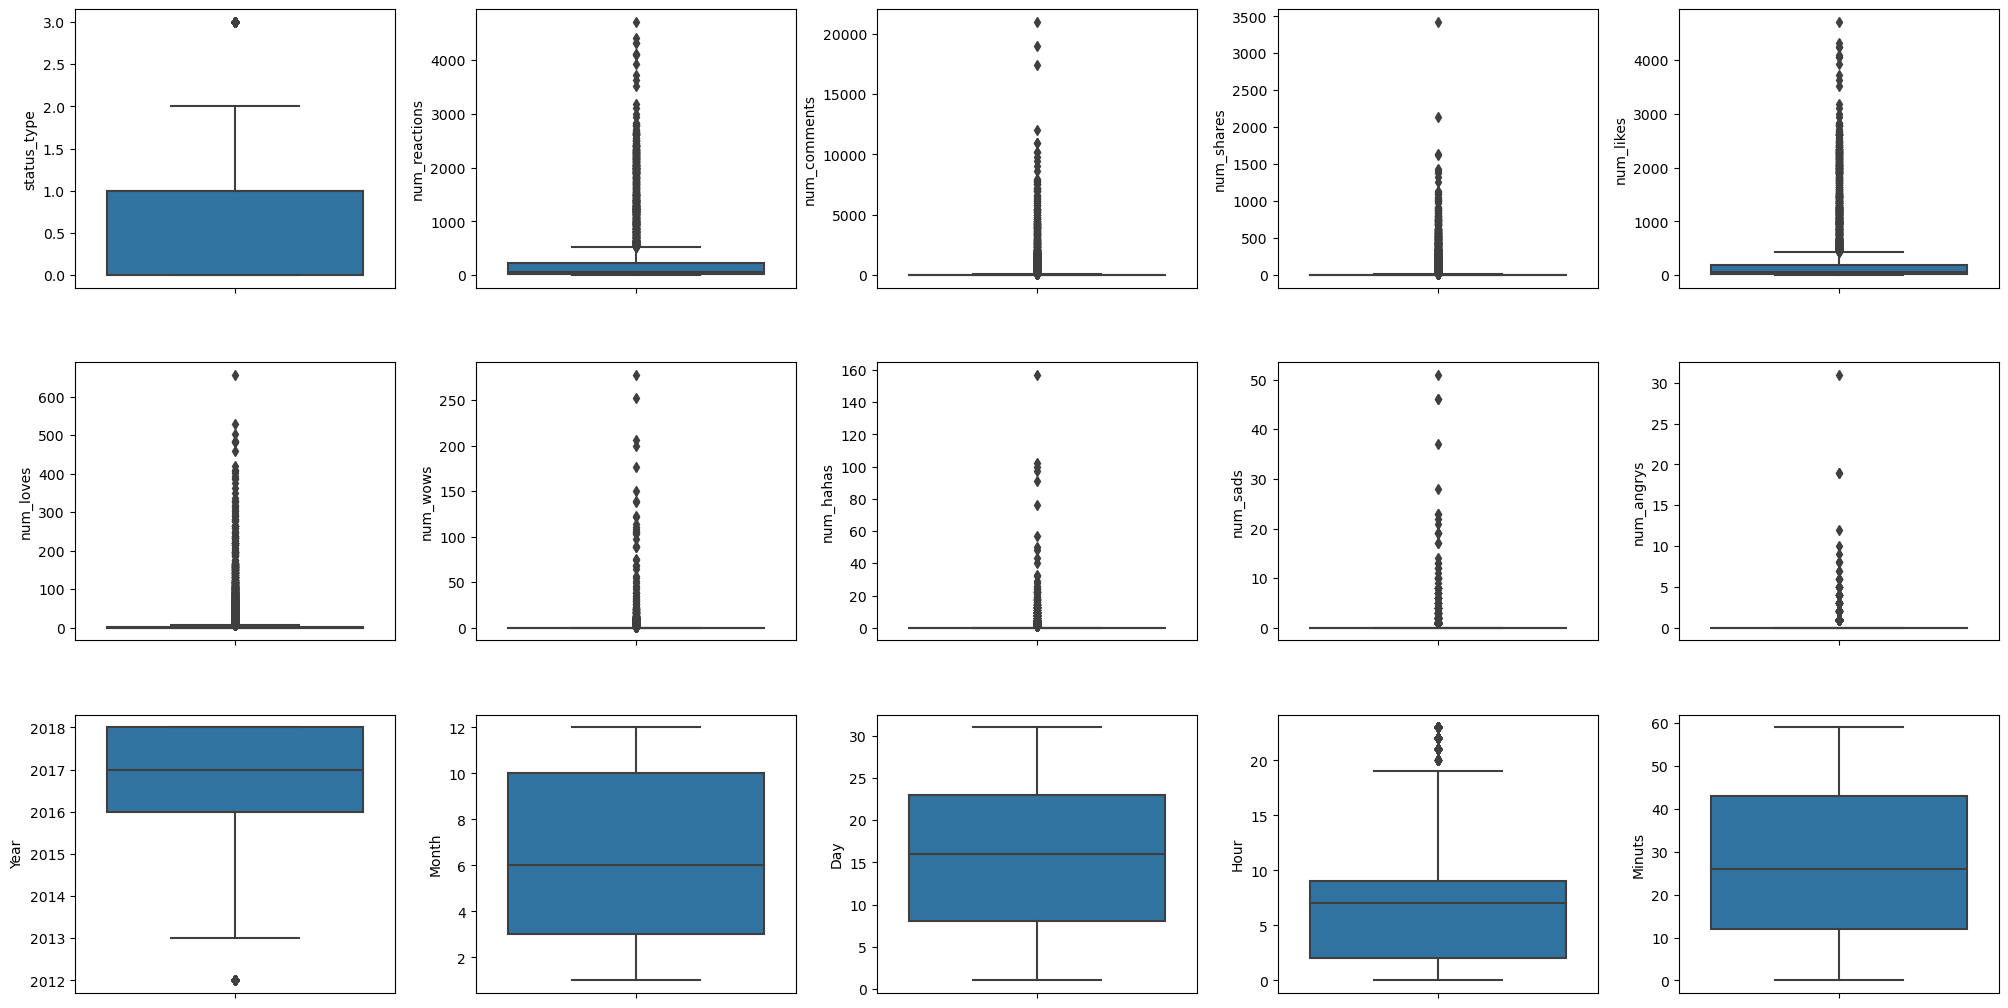

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

y = Thai_df['status_type']

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Thai_df.items():
    sns.boxplot(y=k, data=Thai_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Escalem les dades: en aquest cas normalitzant les dades amb MinMaxScaler (transforma les dade per a que estiguin en rang 0 a 1)

MinMax_scaler = MinMaxScaler()
x_MinMax_scaled = MinMax_scaler.fit_transform(Thai_df)
Thai_df_MinMax = pd.DataFrame(x_MinMax_scaled)

Thai_df_MinMax.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,1.0,0.272727,0.700000,0.260870,0.000000
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.272727,0.666667,0.956522,0.762712
2,0.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,1.0,0.272727,0.666667,0.260870,0.288136
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.272727,0.666667,0.086957,0.491525
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0,0.272727,0.566667,0.130435,0.372881


In [16]:
from sklearn.preprocessing import StandardScaler

# Escalem les dades: en aquest cas estandaritzant les dades amb SatandardScaler. Mitjana = 0 i Desviació etandard = 1

std_scaler = StandardScaler()
x_std_scaled = std_scaler.fit_transform(Thai_df)
Thai_df_std_escaled = pd.DataFrame(x_std_scaled)

Thai_df_std_escaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.105851,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,0.832651,-0.718661,0.711213,-0.265669,-1.563090
1,0.309333,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0.832651,-0.718661,0.596638,2.057750,0.992005
2,-1.105851,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,0.832651,-0.718661,0.596638,-0.265669,-0.597832
3,0.309333,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0.832651,-0.718661,0.596638,-0.846524,0.083527
4,0.309333,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,0.832651,-0.718661,0.252911,-0.701310,-0.313932


In [17]:
from sklearn.preprocessing import RobustScaler

# Escalem les dades: en aquest cas estandaritzant les dades amb RobustScaler.
        # Amb RobustScaler els valors atípics no tenen tanta influència en el procès d'estandarització

rb_scaler = RobustScaler()
x_rb_scaled = rb_scaler.fit_transform(Thai_df)
Thai_df_rb_escaled = pd.DataFrame(x_rb_scaled)

Thai_df_rb_escaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,0.5,-0.285714,0.400000,-0.142857,-0.838710
1,0.0,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,0.5,-0.285714,0.333333,2.142857,0.612903
2,-1.0,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,0.5,-0.285714,0.333333,-0.142857,-0.290323
3,0.0,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,0.5,-0.285714,0.333333,-0.714286,0.096774
4,0.0,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,0.5,-0.285714,0.133333,-0.571429,-0.129032


### PCA - Principal Component Analysis

- Abans de realitzar la classificació amb K-Means, utilitzarem la tècnica d'analisis PCA
- PCA és la tècnica que permet reduïr la dimensió de les dades mitjançant la creació de noves variables anomenades 'Components Principals', que obtenen la major variança possible de les dades inicials.  

Text(0, 0.5, 'Explained variance')

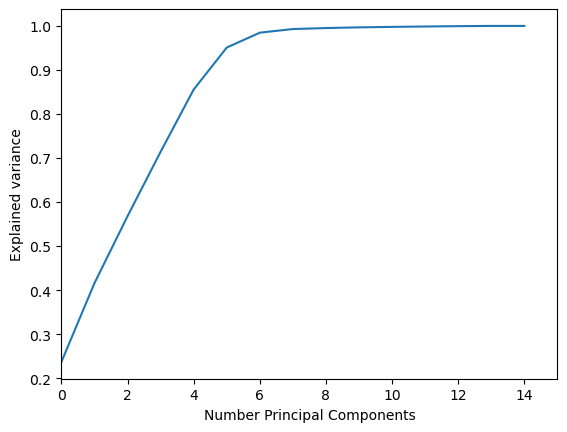

In [18]:
# Apliquem el PCA: dades normalitzades MinMaxScaler

import numpy as np
from sklearn.decomposition import PCA

Thai_PCA = PCA().fit(Thai_df_MinMax)
plt.plot(np.cumsum(Thai_PCA.explained_variance_ratio_))
plt.xlim(0,15)
plt.xlabel('Number Principal Components')
plt.ylabel('Explained variance')

- 6 components per explicar més del 90% de la variança

Text(0, 0.5, 'Explained variance')

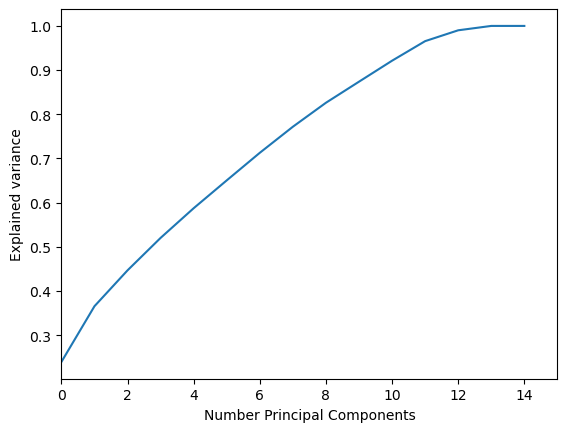

In [19]:
# Apliquem el PCA: dades estandaritzades StandardScaler

import numpy as np
from sklearn.decomposition import PCA

Thai_PCA_std = PCA().fit(Thai_df_std_escaled)
plt.plot(np.cumsum(Thai_PCA_std.explained_variance_ratio_))
plt.xlim(0,15)
plt.xlabel('Number Principal Components')
plt.ylabel('Explained variance')

- 10 components per explicar més del 90% de la variança

Text(0, 0.5, 'Explained variance')

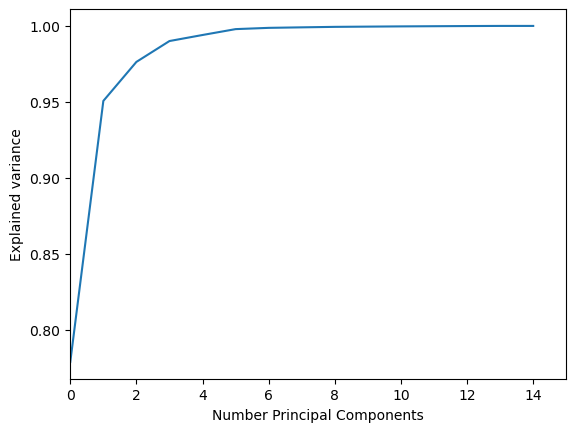

In [20]:
# Apliquem el PCA: dades estandaritzades RobustScaler

import numpy as np
from sklearn.decomposition import PCA

Thai_PCA_rb = PCA().fit(Thai_df_rb_escaled)
plt.plot(np.cumsum(Thai_PCA_rb.explained_variance_ratio_))
plt.xlim(0,15)
plt.xlabel('Number Principal Components')
plt.ylabel('Explained variance')

- Amb dos __2__ components pot explicar-se més del 90% de la variança

#### PCA 2 components

- Un cop realitzat l'analisi previ, realitzem un PCA prenent dos (2) components pricipals (prenent les dades estandaritzades amb RobustScaler)

In [21]:
# determinem el número de components:

pca = PCA(n_components=2)

# Generem el PCA de 2 components:

PCA2 = pca.fit_transform(Thai_df_rb_escaled)

# Generem un DataFrame del nou PCA:

Thai_PCA_df = pd.DataFrame(data = PCA2, columns = ['principal component 1', 'principal component 2'])

Thai_PCA_df.head()


,principal component 1,principal component 2
0,49.105471,37.990359
1,-14.526409,-2.024121
2,3.552729,3.344427
3,-14.528639,-2.021850
4,-13.892615,-1.188092


#### PCA 2 components

- Representació gràfica 2D

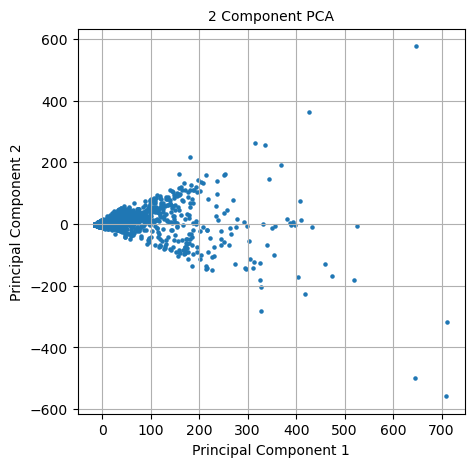

In [22]:
#realitzem la representació gràfica

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 Component PCA', fontsize = 10)

ax.scatter(Thai_PCA_df['principal component 1'], Thai_PCA_df['principal component 2'],s = 5)

ax.grid()    

In [23]:
# Taula analisi: 

col = list(Thai_df.columns)
attributes_pca = pd.DataFrame({'Attribute' : col, 'principal component 1': pca.components_[0], 'principal component 2': pca.components_[1]})

# Per resaltar els valors màxims
attributes_pca.style.highlight_max(['principal component 1', 'principal component 2'])

,Attribute,principal component 1,principal component 2
0,status_type,-0.004661,-0.002959
1,num_reactions,0.010806,0.016317
2,num_comments,0.759980,-0.647269
3,num_shares,0.611595,0.694984
4,num_likes,0.008654,0.013699
5,num_loves,0.208528,0.272674
6,num_wows,0.058385,0.149847
7,num_hahas,0.034210,0.026880
8,num_sads,0.008320,-0.001500
9,num_angrys,0.004580,0.004620


### Classificació K-means

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

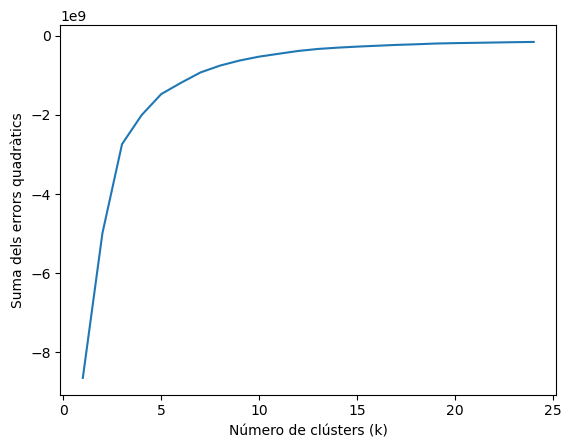

In [30]:
# Realitzem la gràfica 'elbow' per determinar el número òptim de clústers (k) 

n_clusters = range(1, 25) # Número d'iteracions a realitzar.
Thai_kmeans = [KMeans(n_clusters=i) for i in n_clusters]
score = [Thai_kmeans[i].fit(Thai_df).score(Thai_df) for i in range(len(Thai_kmeans))]
score

plt.xlabel('Número de clústers (k)', fontsize = 10)
plt.ylabel('Suma dels errors quadràtics', fontsize = 10)
plt.plot(n_clusters,score)


- S'estableix un valor de k=5

In [31]:
# Entrenem el model:

Thai_kmeans = KMeans(n_clusters=5, random_state=42)

Thai_kmeans.fit(Thai_PCA_df)

y_pred = Thai_kmeans.predict(Thai_PCA_df)

Text(0.5, 1.0, 'Visualització Clústers')

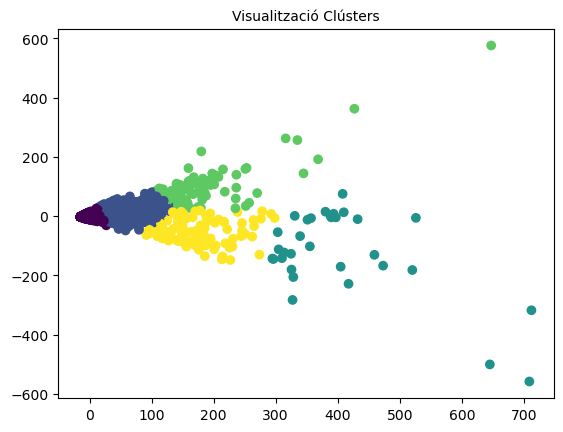

In [32]:
# Fem la representació grafica dels clústers

ig, ax = plt.subplots() 

scatter = ax.scatter(Thai_PCA_df.iloc[:,0], Thai_PCA_df.iloc[:,1], c=y_pred)

plt.title('Visualització Clústers', fontsize = 10)



Text(0.5, 1.0, 'Visualització centre dels clústers')

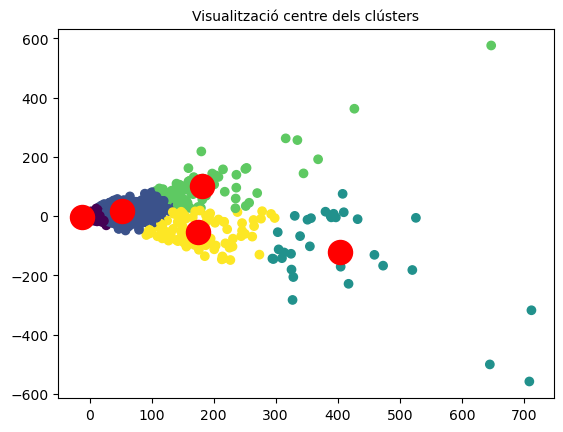

In [34]:
# I realitzem la visualització dels centres dels clústers

fig, ax = plt.subplots()

ax.scatter(Thai_PCA_df.iloc[:,0], Thai_PCA_df.iloc[:,1], c=y_pred)

plt.scatter(Thai_kmeans.cluster_centers_[:, 0], Thai_kmeans.cluster_centers_[:, 1], s=300, c='red')

plt.title('Visualització centre dels clústers', fontsize = 10)


### Analisis de les variables

- Mirem d'analitzar la influencia de cada variable en l'agrupació de dades, evaluant la distribució de les variables en cada clúster
- Anteriorment hem vist que el Component Princial 1 està relacionat amb la variable 'num_comments' i el Component Principal 2 amb la variable 'num_shares'

In [35]:
Thai_df['Cluster'] = y_pred
Thai_df.Cluster.unique()

array([1, 0, 3, 4, 2])

In [36]:
# Realitzem el Data Frame amb els clústers i l'analisi de les variables 'num_comments' i 'num_shares'

Thai_df.groupby(['Cluster'])[['num_comments','num_shares']].agg(['count','mean', max, min]).style.highlight_min() 


Text(0.5, 1.0, 'Histograma de clusters')

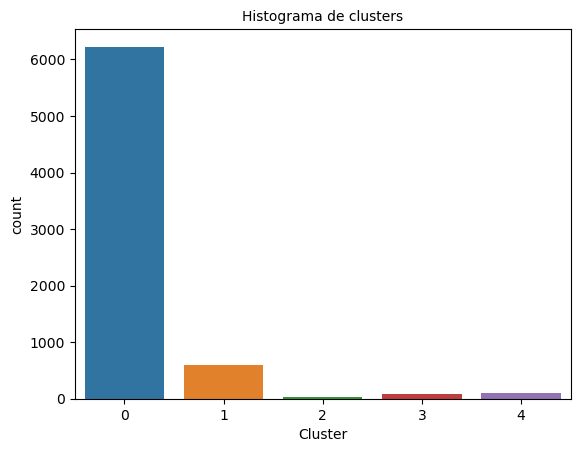

In [37]:
# Represenatció gràfica dels clústers

Cluster_hist = sns.countplot(x=Thai_df['Cluster'])
Cluster_hist.set_title("Histograma de clusters", fontsize = 10)

#### Comentaris

- El primer clúster (clúester '0') agrupa la major part de les dades
- Fent aquest primer analisi podriem dir que el major número de reaccions com 'comments' i 'shares' es concentren en un número mínim de publicacions.
- Podriem afegir que el 90% de les publicacions generen un nombre mínim de reaccions com 'comments' i 'shares'

-------------------------------------------------------------------------------------------------------------------------------

### Exercici 2

- Classifica els diferents registres utilitzant l'algoritme de clustering jeràrquic

In [42]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Per facilitar els càlculs, reduïm el DF al 20%

Thai_df_reduit = Thai_df.sample(frac=.20, random_state=42)
Thai_df_reduit.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Year,Month,Day,Hour,Minuts,Cluster
count,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000
mean,0.778014,240.070213,194.924113,35.678723,225.421986,12.428369,1.120567,0.704255,0.276596,0.114184,2016.351773,6.665957,15.918440,7.541844,27.786525,0.167376
std,0.678954,465.667746,788.720000,118.784701,453.371483,39.575401,6.122102,4.154886,2.092965,0.953354,1.939013,3.584889,8.638042,6.800724,17.710365,0.581535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,8.000000,2.000000,12.000000,0.000000
50%,1.000000,65.000000,5.000000,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,6.000000,16.000000,7.000000,27.000000,0.000000
75%,1.000000,225.000000,22.000000,3.750000,190.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,10.000000,23.000000,9.000000,43.000000,0.000000
max,3.000000,3115.000000,12003.000000,1618.000000,3115.000000,421.000000,108.000000,100.000000,46.000000,31.000000,2018.000000,12.000000,31.000000,23.000000,59.000000,4.000000


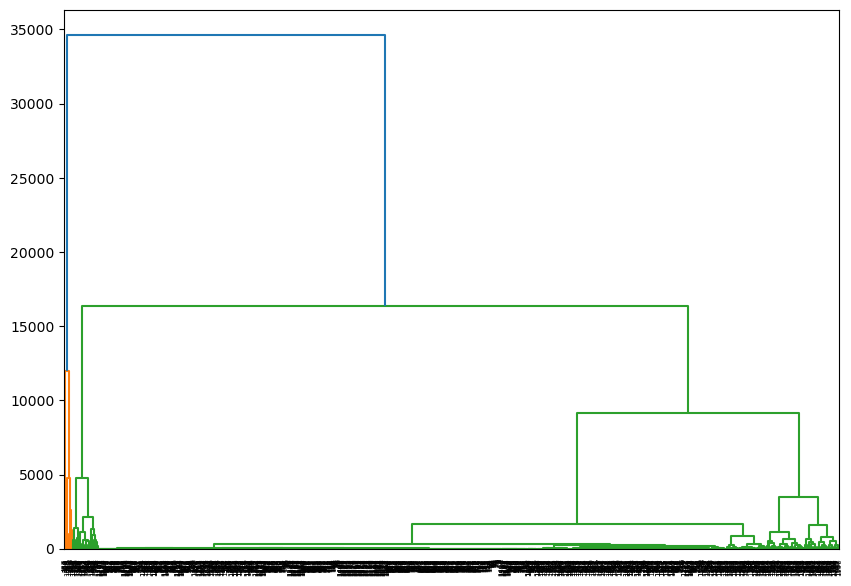

In [43]:
# Per a la representació gràfica de les dades agafem les variables 'num_comments' i 'num_shares'

x = Thai_df_reduit.iloc[:, [2, 3]].values

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

- Podriem establir 5 clústers: la distància vertical més gran que no intersecciona amb cap clúster és la verda de la dreta. Donat que hi ha 5 línies verticals que creuen el llindar, s'estableixen 5 clústers.

In [44]:
# Calculem la proximitat dels clústers

Thai_AggC = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Thai_AggC.fit(x)
labels = Thai_AggC.labels_

np.set_printoptions(threshold=np.inf)

labels

array([4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 2, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4,

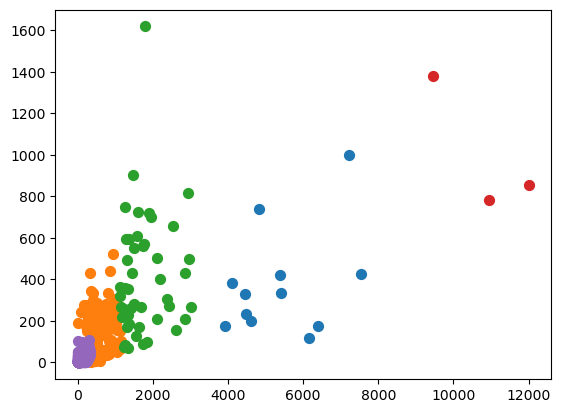

In [45]:
# Realitzem la representació gràfica

plt.scatter(x[labels==0, 0], x[labels==0, 1], s=50) 
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=50) 
plt.scatter(x[labels==2, 0], x[labels==2, 1], s=50) 
plt.scatter(x[labels==3, 0], x[labels==3, 1], s=50) 
plt.scatter(x[labels==4, 0], x[labels==4, 1], s=50) 
plt.show()

In [46]:
# Realitzem el mateix que en el cas anterior: un DF i histograma

Thai_AggC_df['Cluster'] = Thai_AggC.labels_
Thai_AggC_df.Cluster.unique()


array([4, 0, 1, 2, 3], dtype=int64)

In [47]:
# Realitzem el Data Frame amb els clústers i l'analisi de les variables 'num_comments' i 'num_shares'

Thai_AggC_df.groupby(['Cluster'])[['num_comments','num_shares']].agg(['count','mean', max, min]).style.highlight_min() 


Text(0.5, 1.0, 'Histograma de clusters')

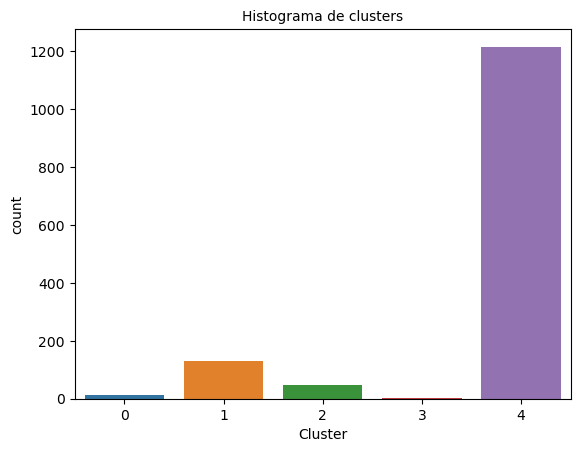

In [48]:
# Representació grafica dels clústers

Cluster_hist_2 = sns.countplot(x=Thai_AggC_df['Cluster'])
Cluster_hist_2.set_title("Histograma de clusters", fontsize = 10)

#### Comentaris

- El cinquè clúster (clúster '4') agrupa la major part de les dades
- Com en l'analisi k-means, en aquest cas també podriem dir que el major número de reaccions com 'comments' i 'shares' es concentren en un número mínim de publicacions.

--------------------------------------------------------------------------------------------------------------------------------

### Exercici 3

- Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

#### Silhouette per a K_Means

In [58]:
silouette_coefficients = []

for k in range(2, 10):
  kmeans_silhouette = KMeans(n_clusters=k)
  kmeans_silhouette.fit(PCA2)
  score = silhouette_score(PCA2, kmeans_silhouette.labels_)
  silouette_coefficients.append(score)

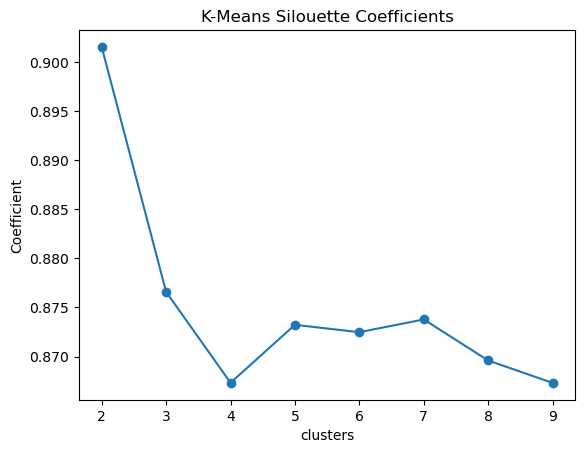

In [60]:
import matplotlib.pyplot as plt

# Generar valores para el eje x
x = range(2, 10)

# Crear el gráfico
plt.plot(x, silouette_coefficients, marker='o')

# Añadir etiquetas y título
plt.xlabel('clusters')
plt.ylabel('Coefficient')
plt.title('K-Means Silouette Coefficients')

# Mostrar el gráfico
plt.show()


Text(0, 0.5, 'Coefficient')

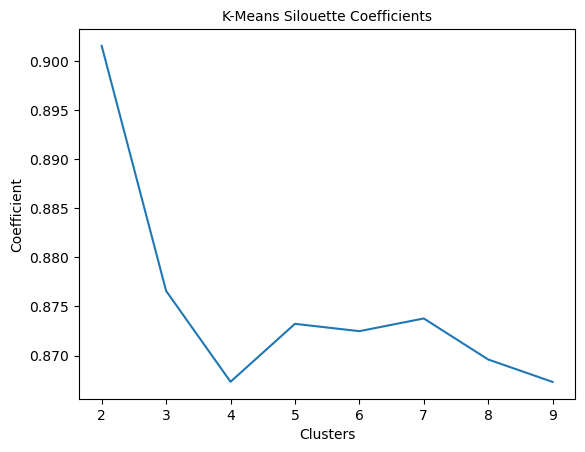

In [61]:
# una altra manera de representar la gràfica

fig, ax = plt.subplots()
ax.plot(range(2, 10), silouette_coefficients)
plt.title('K-Means Silouette Coefficients', fontsize = 10)
plt.xlabel('Clusters') 
plt.ylabel('Coefficient') 

#### Comentaris

- Allà a on s'estabilitza la corba, coincideix amb el cluster 5, podríem determinar que 5 és el número òptim de clústers.
- Coincidiria amb l'analisi previament realitzat amb K-Means

-------------------------------------------------------------------------------------------------------------------------------

#### Silhouette per a Clustering Jeràrquic

In [51]:
silouette_coefficients = []

for k in range(2, 10):
  AggC_silhouette = AgglomerativeClustering(n_clusters=k)
  AggC_silhouette.fit_predict(Thai_AggC_df)
  score = silhouette_score(Thai_AggC_df, AggC_silhouette.labels_)
  silouette_coefficients.append(score)

Text(0, 0.5, 'Coefficient')

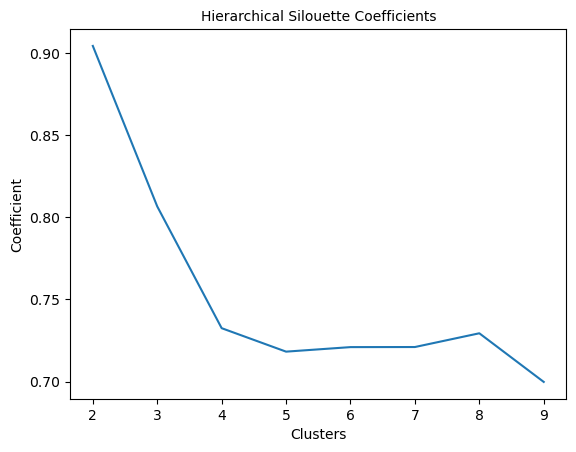

In [52]:
fig, ax = plt.subplots()
ax.plot(range(2, 10), silouette_coefficients)
plt.title('Hierarchical Silouette Coefficients', fontsize = 10)
plt.xlabel('Clusters') 
plt.ylabel('Coefficient') 

#### Comentaris
- Allà a on s'estabilitza la corba, coincideix amb el cluster 5, podríem determinar que 5 és el número òptim de clústers.
- Coincidiria amb l'analisi previament realitzat amb Clustering Jeràrquic